In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import glob
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import os

In [2]:
df = pd.read_csv("our_evaluate_result.csv", header = None)
df.columns = ["Offline result name", "Online algorithm", "Number of visitors", "Simulation days",
             "Random seed", "Energy consumption", "Building utilization rate", "Number of visitor groups",
             "Number of groups rejected", "Number of visitors rejected", "Average thermal comfort",
             "Minimum thermal comfort", "Use Adjacent Zone For Q", "Q performance"] + [f"Occupant distribution Day {i}" for i in range(11)]
df["Offline algorithm"] = ["MINLP (" + df["Offline result name"][i].split('_')[-3] + ")" if "special" not in df["Offline result name"][i] else "Even (" + df["Offline result name"][i].split('_')[-3] + ")" for i in range(len(df))]

vals = dict()
for expand_name in ["Average thermal comfort", "Minimum thermal comfort", "Building utilization rate", "Number of groups rejected", "Number of visitors rejected"]:
    vals.update({f"{expand_name} day {i}": list() for i in range(11)})
    vals[f"{expand_name} - mean"] = [vals[f"{expand_name} day {i}"] for i in range(11)]
    for i in range(len(df)):
        data = eval(df[expand_name].iloc[i])
        for j in range(11):
            vals[f"{expand_name} day {j}"].append(data[j])
    
    vals[f"{expand_name} - mean"] = np.array(vals[f"{expand_name} - mean"]).mean(axis=0)

for k in vals:
    df[k] = vals[k]
df["Energy consumption"] /= 4000000
df["Use Adjacent Zone For Q"][df["Use Adjacent Zone For Q"] == True] = "w/ T_adj"
df["Use Adjacent Zone For Q"][df["Use Adjacent Zone For Q"] == False] = "w/o T_adj"

/tmp/ipykernel_1431403/593125183.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Use Adjacent Zone For Q"][df["Use Adjacent Zone For Q"] == True] = "w/ T_adj"


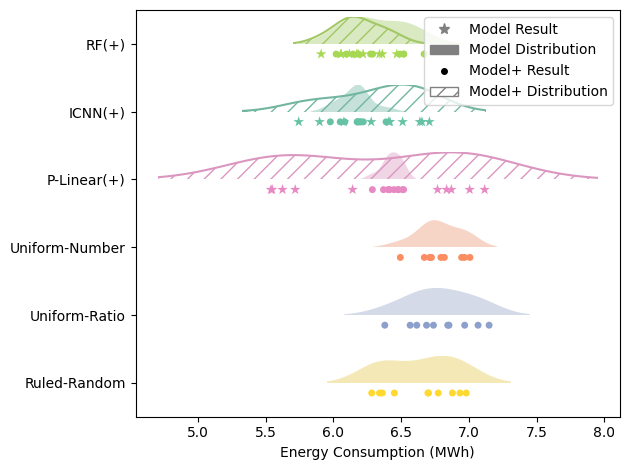

In [3]:
selected_data = dict()
order = ["MINLP (rf)", "MINLP (nn)", "MINLP (linear)", "Even (occ)", "Even (weight)", "Even (random)"]
temp_df = df[df["Online algorithm"] == "none"]
data_1 = temp_df[temp_df["Use Adjacent Zone For Q"] == "w/ T_adj"]
data_2 = temp_df[temp_df["Use Adjacent Zone For Q"] == "w/o T_adj"]
ax = sns.violinplot(data=data_2, y="Offline algorithm", x="Energy consumption", orient='h', hue="Offline algorithm", dodge=False, palette="Set2", inner=None, order=order)
sns.violinplot(data=data_1, y="Offline algorithm", x="Energy consumption", orient='h', hue="Offline algorithm", dodge=False, palette="Set2", inner=None, order=order, ax=ax)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for i, violin in enumerate(ax.collections):
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax.transData))
    if i >= 3:
        violin.set_edgecolor('none')
        violin.set_alpha(0.4)
    else:
        violin.set_edgecolor(ax.collections[i + 3].get_facecolor())
        violin.set_hatch('//')
        violin.set_facecolor('none')

old_len_collections = len(ax.collections)
sns.stripplot(data=data_2, y="Offline algorithm", x="Energy consumption", orient='h', hue="Offline algorithm", dodge=False, palette="Set2", ax=ax, order=order, marker="*", s=8, jitter=False)
sns.stripplot(data=data_1, y="Offline algorithm", x="Energy consumption", orient='h', hue="Offline algorithm", dodge=False, palette="Set2", ax=ax, order=order, jitter=False)
for i, dots in enumerate(ax.collections[old_len_collections:]):
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.15]))
    if i < 3:
        dots.set_color(ax.collections[old_len_collections + i + 9].get_facecolor())
    
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Energy Consumption (MWh)")
ax.set_yticklabels(["RF(+)", "ICNN(+)", "P-Linear(+)", "Uniform-Number", "Uniform-Ratio", "Ruled-Random"])
ax.set_ylabel(None)
ax.legend_.remove()
a = mlines.Line2D([], [], color='grey', marker='*', ls='', markersize=8, label='Model Result')
a_patch = mpatches.Patch(color='grey', label='Model Distribution')
b = mlines.Line2D([], [], color='black', marker='.', ls='', markersize=8, label='Model+ Result')
b_patch = mpatches.Patch(facecolor="white", edgecolor="grey", hatch="//", label='Model+ Distribution')

plt.legend(handles=[a, a_patch, b, b_patch])
plt.tight_layout()
plt.show()

/tmp/ipykernel_1431403/258173108.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["MINLP-ICNN+", "Uniform-Number", "Uniform-Ratio", "Random"])


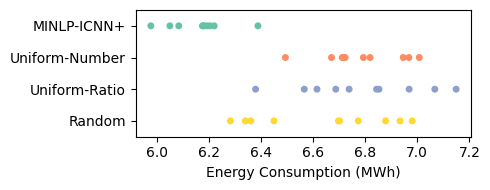

In [4]:
selected_data = dict()
order = ["MINLP (nn)", "Even (occ)", "Even (weight)", "Even (random)"]
temp_df = df[df["Online algorithm"] == "none"]
data_1 = temp_df[temp_df["Use Adjacent Zone For Q"] == "w/ T_adj"]

plt.figure(figsize=(5, 2))
ax = sns.stripplot(data=data_1, y="Offline algorithm", x="Energy consumption", orient='h', hue="Offline algorithm", dodge=False, palette="Set2", order=order, jitter=False)
ax.set_xlabel("Energy Consumption (MWh)")
ax.set_yticklabels(["MINLP-ICNN+", "Uniform-Number", "Uniform-Ratio", "Random"])
ax.set_ylabel(None)
ax.legend_.remove()
plt.tight_layout()
plt.show()

/tmp/ipykernel_1431403/1223626751.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["MINLP-ICNN+", "Uniform-Number", "Uniform-Ratio", "Random"])


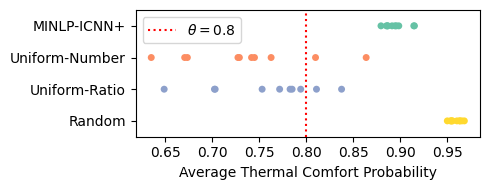

In [5]:
selected_data = dict()
order = ["MINLP (nn)", "Even (occ)", "Even (weight)", "Even (random)"]
temp_df = df[df["Online algorithm"] == "none"]
data_1 = temp_df[temp_df["Use Adjacent Zone For Q"] == "w/ T_adj"]

plt.figure(figsize=(5, 2))
ax = sns.stripplot(data=data_1, y="Offline algorithm", x="Average thermal comfort day 0", orient='h', hue="Offline algorithm", dodge=False, palette="Set2", order=order, jitter=False)
ax.set_xlabel("Average Thermal Comfort Probability")
ax.set_yticklabels(["MINLP-ICNN+", "Uniform-Number", "Uniform-Ratio", "Random"])
ax.set_ylabel(None)
ax.legend_.remove()
vline = plt.axvline(0.8, linestyle=":", color="red", label="Thermal Comfort Threshold")
plt.legend([vline], ["$\\theta=0.8$"])
plt.tight_layout()
plt.show()

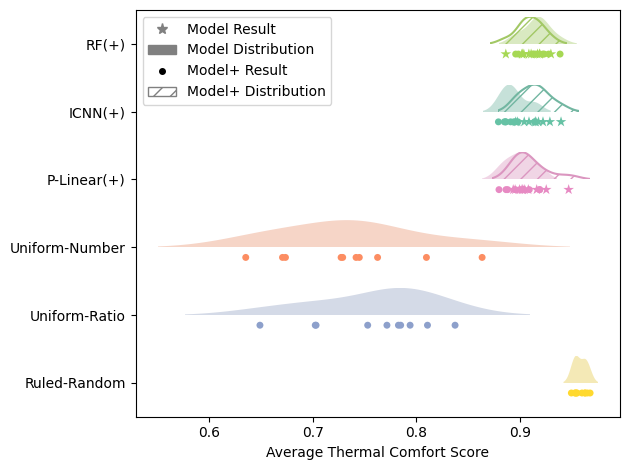

In [6]:
selected_data = dict()
order = ["MINLP (rf)", "MINLP (nn)", "MINLP (linear)", "Even (occ)", "Even (weight)", "Even (random)"]
temp_df = df[df["Online algorithm"] == "none"]
data_1 = temp_df[temp_df["Use Adjacent Zone For Q"] == "w/ T_adj"]
data_2 = temp_df[temp_df["Use Adjacent Zone For Q"] == "w/o T_adj"]
ax = sns.violinplot(data=data_2, y="Offline algorithm", x="Average thermal comfort day 0", orient='h', hue="Offline algorithm", dodge=False, palette="Set2", inner=None, order=order)
sns.violinplot(data=data_1, y="Offline algorithm", x="Average thermal comfort day 0", orient='h', hue="Offline algorithm", dodge=False, palette="Set2", inner=None, order=order, ax=ax)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for i, violin in enumerate(ax.collections):
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax.transData))
    if i >= 3:
        violin.set_edgecolor('none')
        violin.set_alpha(0.4)
    else:
        violin.set_edgecolor(ax.collections[i + 3].get_facecolor())
        violin.set_hatch('//')
        violin.set_facecolor('none')

old_len_collections = len(ax.collections)
sns.stripplot(data=data_2, y="Offline algorithm", x="Average thermal comfort day 0", orient='h', hue="Offline algorithm", dodge=False, palette="Set2", ax=ax, order=order, marker="*", s=8, jitter=False)
sns.stripplot(data=data_1, y="Offline algorithm", x="Average thermal comfort day 0", orient='h', hue="Offline algorithm", dodge=False, palette="Set2", ax=ax, order=order, jitter=False)
for i, dots in enumerate(ax.collections[old_len_collections:]):
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.15]))
    if i < 3:
        dots.set_color(ax.collections[old_len_collections + i + 9].get_facecolor())
    
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("Average Thermal Comfort Score")
ax.set_yticklabels(["RF(+)", "ICNN(+)", "P-Linear(+)", "Uniform-Number", "Uniform-Ratio", "Ruled-Random"])
ax.set_ylabel(None)
ax.legend_.remove()
a = mlines.Line2D([], [], color='grey', marker='*', ls='', markersize=8, label='Model Result')
a_patch = mpatches.Patch(color='grey', label='Model Distribution')
b = mlines.Line2D([], [], color='black', marker='.', ls='', markersize=8, label='Model+ Result')
b_patch = mpatches.Patch(facecolor="white", edgecolor="grey", hatch="//", label='Model+ Distribution')

plt.legend(handles=[a, a_patch, b, b_patch])
plt.tight_layout()
plt.show()

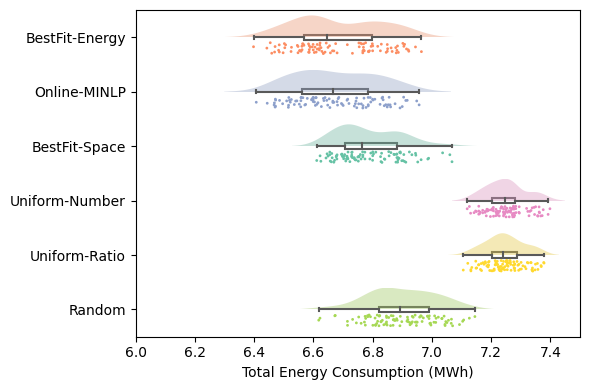

In [7]:
selected_data = dict()
order = ["greedy", "minlp", "fair", "even_occ", "even_weight", "even_random"]
temp_df = df[df["Online algorithm"] != "none"]
temp_df = temp_df[temp_df["Offline algorithm"] == "MINLP (nn)"]
temp_df = temp_df[temp_df["Use Adjacent Zone For Q"] == "w/ T_adj"]

plt.figure(figsize=(6, 4))
data_1 = temp_df[temp_df["Number of visitors"] == 200]
ax = sns.violinplot(data=data_1, y="Online algorithm", x="Energy consumption", orient='h', hue="Online algorithm", dodge=False, palette="Set2", inner=None, order=order)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for i, violin in enumerate(ax.collections):
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width, height / 2, transform=ax.transData))
    violin.set_edgecolor('none')
    violin.set_alpha(0.4)

old_len_collections = len(ax.collections)
sns.stripplot(data=data_1, y="Online algorithm", x="Energy consumption", orient='h', hue="Online algorithm", dodge=False, palette="Set2", ax=ax, order=order, jitter=True, s=2)
for i, dots in enumerate(ax.collections[old_len_collections:]):
    dots.set_offsets(dots.get_offsets() + np.array([0, 0.2]))

sns.boxplot(data=data_1, y="Online algorithm", x="Energy consumption", orient='h', hue="Online algorithm", dodge=False, palette="Set2", ax=ax, order=order,
            saturation=1, showfliers=False, width=0.1, boxprops={'facecolor': 'none'})
    
ax.set_xlim([6, 7.5])
ax.set_ylim(ylim)
ax.set_xlabel("Total Energy Consumption (MWh)")
ax.set_yticklabels(["BestFit-Energy", "Online-MINLP", "BestFit-Space", "Uniform-Number", "Uniform-Ratio", "Random"])
ax.set_ylabel(None)
ax.legend_.remove()
plt.tight_layout()
plt.show()

In [8]:
with open("curve_results.pkl", "rb") as pklfile:
    online_datas = pickle.load(pklfile)
online_algorithms = ["greedy", "fair", "minlp", "even_occ", "even_weight", "even_random"]
matrics = ["Average Thermal Comfort Probability", "Allocated Short-term Occupants", "Rejected Short-term Occupants", "Rejected Groups", "Rejection Rate (%)", "Average Thermal Comfort Score2"]

# # Original code to read results. Due to the number of csvs needed to recreate the result, a loaded pickle file is used instead.
# online_datas = [dict() for _ in range(6)]
# online_algorithms = ["greedy", "fair", "minlp", "even_occ", "even_weight", "even_random"]
# matrics = ["Average Thermal Comfort Probability", "Allocated Short-term Occupants", "Rejected Short-term Occupants", "Rejected Groups", "Rejection Rate (%)", "Average Thermal Comfort Score2"]

# for online in online_algorithms:
#     results = [list() for _ in range(5)]
#     for file_name in glob.glob(f"results/curves/{online}*"):
#         with open(file_name, "rb") as pkl_file:
#             curves = pickle.load(pkl_file)
#         for offline in range(len(curves)):
#             for i in range(len(curves[offline])):
#                 results[i].append(curves[offline][i])
    
#     for i in range(len(results)):
#         results[i] = np.array(results[i])
#         online_datas[i][online] = results[i].mean(axis=0)
#         online_datas[i][f"{online}-std"] = results[i].std(axis=0)
    
#     results[0] = results[0].flatten()
#     results[1] = results[1].flatten()
#     online_datas[5][f"{online}-y"] = results[0]
#     online_datas[5][f"{online}-x"] = results[1]


# for i in range(len(online_datas)):
#     online_datas[i] = pd.DataFrame(online_datas[i])

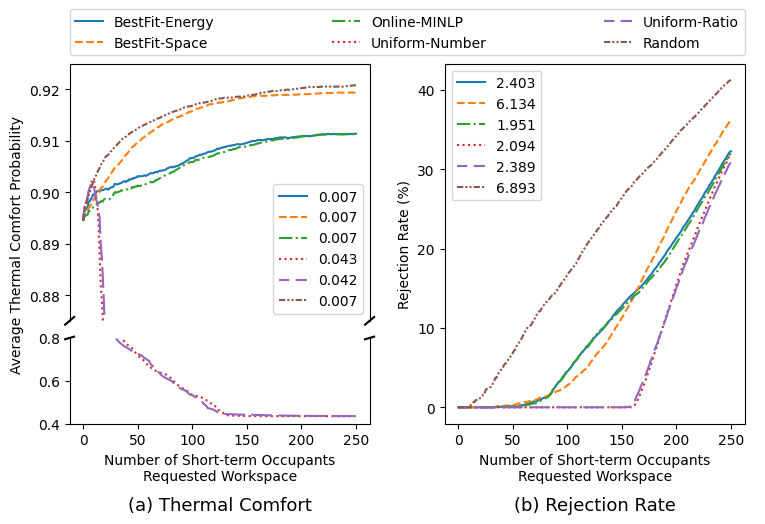

In [9]:
plot_names = {"greedy": "BestFit-Energy", "fair": "BestFit-Space", "minlp": "Online-MINLP", "even_occ": "Uniform-Number", "even_weight": "Uniform-Ratio", "even_random": "Random"}

fig, axs = plt.subplots(2, 2, figsize=(7.5, 4), gridspec_kw={'height_ratios': [3, 1]})
gs = axs[0, 1].get_gridspec()
for ax in axs[:, -1]:
    ax.remove()
axbig = fig.add_subplot(gs[:, -1])

for j, online in enumerate(online_algorithms):
    plot_data = online_datas[0][online].copy()
    axs[0, 0].plot(plot_data, label=f"{online_datas[0][f'{online}-std'].values[-1]:.3f}", linestyle=["-", "--", "-.", ":", (5, (10, 3)), (0, (3, 1, 1, 1, 1, 1))][j])
    axs[1, 0].plot(plot_data, label=f"{plot_names[online]}", linestyle=["-", "--", "-.", ":", (5, (10, 3)), (0, (3, 1, 1, 1, 1, 1))][j])

axs[0, 0].set_ylim([0.875, 0.925])
axs[1, 0].set_ylim([0.4, 0.8])

axs[0, 0].spines['bottom'].set_visible(False)
axs[0, 0].set_xticks([])
axs[1, 0].spines['top'].set_visible(False)
axs[0, 0].tick_params(labeltop=False)  # don't put tick labels at the top
axs[1, 0].xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axs[0, 0].transAxes, color='k', clip_on=False)
axs[0, 0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
axs[0, 0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axs[1, 0].transAxes)  # switch to the bottom axes
axs[1, 0].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
axs[1, 0].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax3 = fig.add_subplot(121, frameon=False)
ax3.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
ax3.set_ylabel(matrics[0], labelpad=10)
# fig.supylabel(matrics[0])
axs[1, 0].set_xlabel("Number of Short-term Occupants\nRequested Workspace")
ax3.set_xlabel("(a) Thermal Comfort", labelpad=35, fontsize=13)

ax4 = fig.add_subplot(122, frameon=False)
ax4.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
ax4.set_xlabel("(b) Rejection Rate", labelpad=35, fontsize=13)

for j, online in enumerate(online_algorithms):
    plot_data = online_datas[4][online].copy()
    axbig.plot(plot_data, label=f"{online_datas[4][f'{online}-std'].values[-1]:.3f}", linestyle=["-", "--", "-.", ":", (5, (10, 3)), (0, (3, 1, 1, 1, 1, 1))][j])
axbig.set_ylabel(matrics[4])
axbig.set_xlabel("Number of Short-term Occupants\nRequested Workspace")

axs[1,0].legend(bbox_to_anchor=(0., 4.3, 2.25, .102), loc=3, ncol=3, mode="expand", borderaxespad=0)
axs[0,0].legend()
axbig.legend()
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95,
                    wspace=0.25,
                    hspace=0.1)
plt.show()

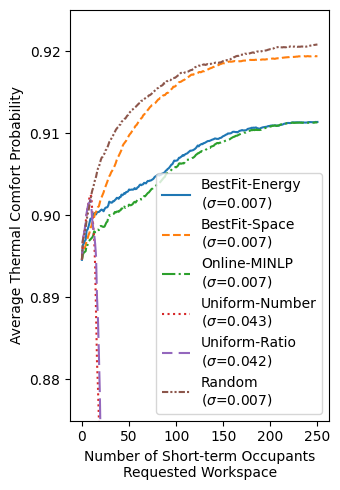

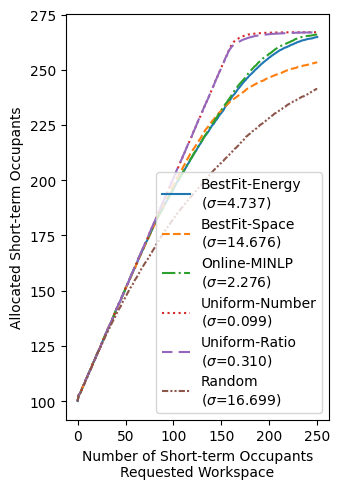

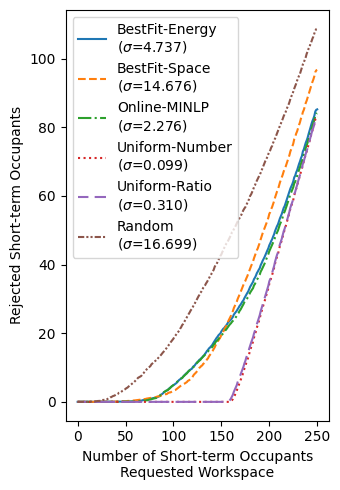

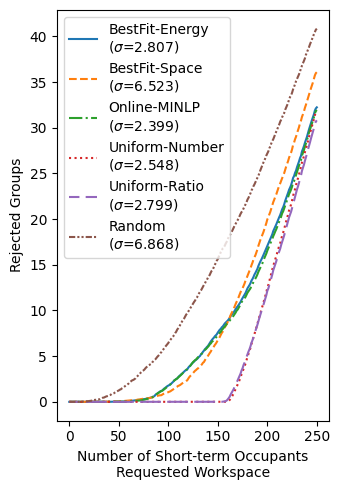

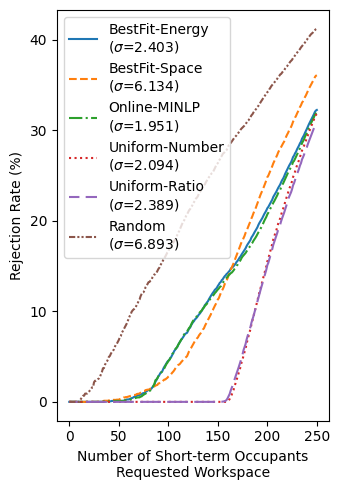

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


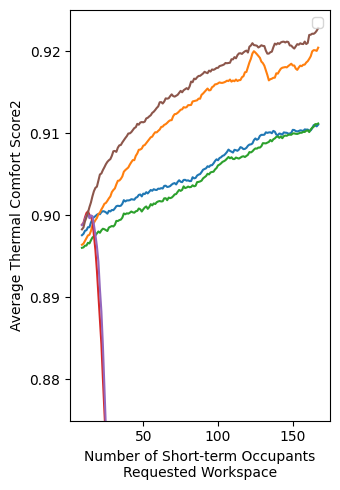

In [10]:
plot_names = {"greedy": "BestFit-Energy", "fair": "BestFit-Space", "minlp": "Online-MINLP", "even_occ": "Uniform-Number", "even_weight": "Uniform-Ratio", "even_random": "Random"}
for i in range(6):
    plt.figure(figsize=(3.5, 5))
    for j, online in enumerate(online_algorithms):
        if i != 5:
            plot_data = online_datas[i][online].copy()
            plt.plot(plot_data, label=f"{plot_names[online]}\n($\sigma$={online_datas[i][f'{online}-std'].values[-1]:.3f})", linestyle=["-", "--", "-.", ":", (5, (10, 3)), (0, (3, 1, 1, 1, 1, 1))][j])
            # plt.fill_between(np.arange(251), online_datas[i][online] - online_datas[i][f"{online}-std"], online_datas[i][online] + online_datas[i][f"{online}-std"],
            #                  edgecolor=None, alpha=0.2)
        else:
            plot_data = online_datas[5].groupby(f"{online}-x").mean().sort_index()
            plt.plot(plot_data.index.values - 100, plot_data[f"{online}-y"].rolling(window=10, closed="both").mean())
    else:
        online_datas
    if i == 0 or i == 5:
        plt.ylim([0.875, 0.925])
    plt.ylabel(matrics[i])
    plt.xlabel("Number of Short-term Occupants\nRequested Workspace")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [11]:
zone_adj = {'Core_top': ['Core_mid', 'Perimeter_top_ZN_1', 'Perimeter_top_ZN_2', 'Perimeter_top_ZN_3', 'Perimeter_top_ZN_4'],
            'Core_mid': ['Core_top', 'Core_bottom', 'Perimeter_mid_ZN_1', 'Perimeter_mid_ZN_2', 'Perimeter_mid_ZN_3', 'Perimeter_mid_ZN_4'],
            'Core_bottom': ['Core_mid', 'Perimeter_bot_ZN_1', 'Perimeter_bot_ZN_2', 'Perimeter_bot_ZN_3', 'Perimeter_bot_ZN_4'],
            'Perimeter_top_ZN_1': ['Core_top', 'Perimeter_mid_ZN_1', 'Perimeter_top_ZN_2', 'Perimeter_top_ZN_4'],
            'Perimeter_top_ZN_2': ['Core_top', 'Perimeter_mid_ZN_2', 'Perimeter_top_ZN_1', 'Perimeter_top_ZN_3'],
            'Perimeter_top_ZN_3': ['Core_top', 'Perimeter_mid_ZN_3', 'Perimeter_top_ZN_2', 'Perimeter_top_ZN_4'],
            'Perimeter_top_ZN_4': ['Core_top', 'Perimeter_mid_ZN_4', 'Perimeter_top_ZN_1', 'Perimeter_top_ZN_3'],
            'Perimeter_mid_ZN_1': ['Core_mid', 'Perimeter_top_ZN_1', 'Perimeter_bot_ZN_1', 'Perimeter_mid_ZN_2', 'Perimeter_mid_ZN_4'],
            'Perimeter_mid_ZN_2': ['Core_mid', 'Perimeter_top_ZN_2', 'Perimeter_bot_ZN_2', 'Perimeter_mid_ZN_1', 'Perimeter_mid_ZN_3'],
            'Perimeter_mid_ZN_3': ['Core_mid', 'Perimeter_top_ZN_3', 'Perimeter_bot_ZN_3', 'Perimeter_mid_ZN_2', 'Perimeter_mid_ZN_4'],
            'Perimeter_mid_ZN_4': ['Core_mid', 'Perimeter_top_ZN_4', 'Perimeter_bot_ZN_4', 'Perimeter_mid_ZN_1', 'Perimeter_mid_ZN_3'],
            'Perimeter_bot_ZN_1': ['Core_bottom', 'Perimeter_mid_ZN_1', 'Perimeter_bot_ZN_2', 'Perimeter_bot_ZN_4'],
            'Perimeter_bot_ZN_2': ['Core_bottom', 'Perimeter_mid_ZN_2', 'Perimeter_bot_ZN_1', 'Perimeter_bot_ZN_3'],
            'Perimeter_bot_ZN_3': ['Core_bottom', 'Perimeter_mid_ZN_3', 'Perimeter_bot_ZN_2', 'Perimeter_bot_ZN_4'],
            'Perimeter_bot_ZN_4': ['Core_bottom', 'Perimeter_mid_ZN_4', 'Perimeter_bot_ZN_1', 'Perimeter_bot_ZN_3']}
control_zones = ['Core_top', 'Core_mid', 'Core_bottom',
                 'Perimeter_top_ZN_3', 'Perimeter_top_ZN_2', 'Perimeter_top_ZN_1', 'Perimeter_top_ZN_4',
                 'Perimeter_bot_ZN_3', 'Perimeter_bot_ZN_2', 'Perimeter_bot_ZN_1', 'Perimeter_bot_ZN_4',
                 'Perimeter_mid_ZN_3', 'Perimeter_mid_ZN_2', 'Perimeter_mid_ZN_1', 'Perimeter_mid_ZN_4']

In [12]:
df = pd.read_csv("log_june.csv", date_format=["time"])

values = list()
for day in range(len(df) // 24):
    data = df[day * 24:day * 24 + 24]
    # if int(data["time"].iloc[0][8:10]) in (16, 22, 23, 29, 30, 17, 24):
    #     continue

    for zone_name in control_zones:
        q_hvac = (data[f"{zone_name} Air System Sensible Cooling Rate"] -
                    data[f"{zone_name} Air System Sensible Heating Rate"]).mean()
        out_temp = data[5:20][f"outdoor temperature"].mean()
        out_night_temp = (data[0:5][f"outdoor temperature"].sum() + data[20:][f"outdoor temperature"].sum()) / 9

        zone_temps = [data[f"temperature {name}"].values[5] for name in control_zones]
        # values.append([zone_name, data[f"temperature {zone_name}"].values[5], (day // 15 * 5 + 220) / 10,
        #                data["site solar radiation"].sum(), out_temp, data[f"occupancy {zone_name}"].max(), q_hvac, out_night_temp] + zone_temps)
        zone_temps = [data[f"{name} Thermostat Cooling Setpoint Temperature"].values[12] for name in control_zones]
        values.append([zone_name, data[f"temperature {zone_name}"].values[5], data[f"{zone_name} Thermostat Cooling Setpoint Temperature"].values[12],
                        data["site solar radiation"].sum(), out_temp, data[f"occupancy {zone_name}"].max(), q_hvac, out_night_temp] + zone_temps)

values = pd.DataFrame(values, columns=["Zone", "Pre temp", "Set temp", "Solar", "Out avg temp", "Occupants", "Zone Energy", "Out night temp"] + control_zones)

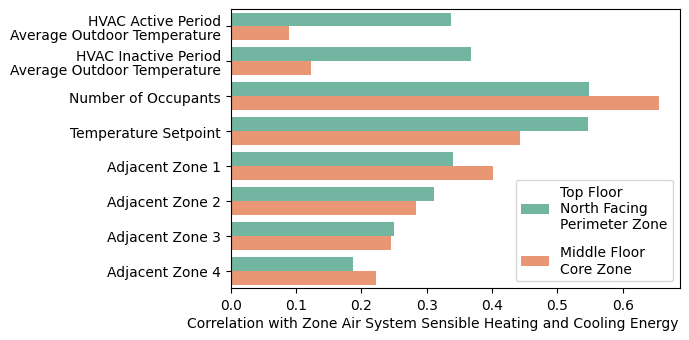

In [13]:
selected_zones = {"Perimeter_top_ZN_1": "Top Floor\nNorth Facing\nPerimeter Zone",
                  "Core_mid": "Middle Floor\nCore Zone"}
order = ["Out night temp", "Out avg temp", "Occupants", "Set temp", "Adjacent Zone 1", "Adjacent Zone 2", "Adjacent Zone 3", "Adjacent Zone 4"]
bar_data = list()
for selected_zone in selected_zones:
    data = values[values["Zone"] == selected_zone]
    corr = data[["Zone Energy", "Out night temp", "Out avg temp", "Occupants", "Set temp"] + zone_adj[selected_zone]].corr().abs()
    corr.sort_values("Zone Energy", inplace=True, ascending=False)
    i = 1
    for name in corr["Zone Energy"].index.values:
        if name == "Zone Energy":
            continue
        elif name in zone_adj:
            alter_name = f"Adjacent Zone {i}"
            i += 1
        else:
            alter_name = name
        bar_data.append([alter_name, corr["Zone Energy"][name], selected_zones[selected_zone]])

bar_data = pd.DataFrame(bar_data, columns=["Feature Name", "Correlation", "Zone"])
plt.figure(figsize=(7, 3.5))
ax = sns.barplot(bar_data, y="Feature Name", x="Correlation", hue="Zone", palette="Set2", order=order, orient="h")
# plt.xticks(rotation=50)
ax.set_yticklabels(["HVAC Active Period\nAverage Outdoor Temperature", "HVAC Inactive Period\nAverage Outdoor Temperature", "Number of Occupants", "Temperature Setpoint", "Adjacent Zone 1", "Adjacent Zone 2", "Adjacent Zone 3", "Adjacent Zone 4"], linespacing=1)
ax.set_xlabel("Correlation with Zone Air System Sensible Heating and Cooling Energy")
ax.xaxis.set_label_coords(.45, -0.1)
ax.set_ylabel("")
plt.legend(loc="lower right", labelspacing=1)
plt.tight_layout()
# sns.heatmap(corr, annot=True, mask=np.triu(np.ones_like(corr, dtype=bool)) - np.identity(corr.shape[0]), cmap=sns.diverging_palette(20, 20, as_cmap=True), vmin=-1, vmax=1)

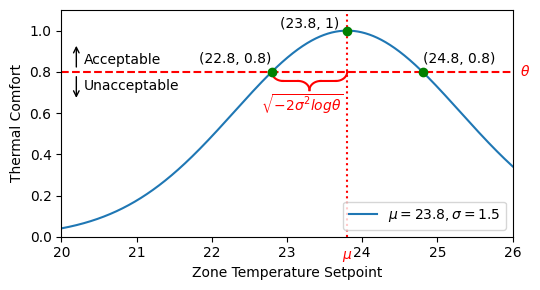

In [14]:
from matplotlibcurlybrace.curlyBrace import curlyBrace
mu = 23.8
std = 1.5
theta = 0.8

x = np.linspace(20, 26, 10000)
y = np.exp(-np.power((x-mu) / std, 2) / 2)
diff = np.sqrt(-2 * np.power(std, 2) * np.log(theta))
x1 = np.array([mu, mu - diff, mu + diff])
y1 = np.exp(-np.power((x1-mu) / std, 2) / 2)

fig, ax = plt.subplots(figsize=(5.5, 3))
plt.plot(x, y, label=f"$\mu={mu}, \sigma={std}$")
plt.axhline(theta, linestyle="--", color="red")
plt.axvline(mu, linestyle=":", color="red")
plt.scatter(x1, y1, zorder=100, color="green")

plt.text(x1[0] - 0.1, y1[0], f"({mu}, 1)", ha="right", va="bottom")
plt.text(x1[1], y1[1] + 0.03, f"({x1[1]:.1f}, {theta})", ha="right", va="bottom")
# plt.text(x1[1], y1[1] + 0.05, "$\mu-\sqrt{-2\sigma^2log\\theta}$", ha="center", va="bottom")
plt.text(x1[2], y1[2] + 0.03, f"({x1[2]:.1f}, {theta})", ha="left", va="bottom")

plt.text(mu, -0.06, "$\mu$", ha="center", va="top", color="red")
plt.text(26.1, theta, "$\\theta$", ha="left", va="center", color="red")
# plt.arrow(20, 0.82, 0, 0.05, length_includes_head=True, head_width=0.05, head_length=0.03)

plt.annotate("", (20.2, theta + 0.14), xytext=(20.2, theta + 0.01), arrowprops=dict(arrowstyle="->"))
plt.annotate("", (20.2, theta - 0.14), xytext=(20.2, theta - 0.01), arrowprops=dict(arrowstyle="->"))
plt.text(20.3, theta + 0.025, "Acceptable", ha="left", va="bottom")
plt.text(20.3, theta - 0.035, "Unacceptable", ha="left", va="top")

# plt.annotate("", (x1[1], theta - 0.1), xytext=(x1[0], theta - 0.1), arrowprops=dict(arrowstyle="<->"))
# plt.annotate("", (x1[1], theta), xytext=(x1[1], theta - 0.15), arrowprops=dict(arrowstyle="-", linestyle=":"))
plt.text((x1[1] + x1[0]) / 2 - 0.1, theta - 0.1, "$\sqrt{-2\sigma^2log\\theta}$", ha="center", va="top", color="red")
curlyBrace(fig, ax, (x1[0], theta), (x1[1], theta), 0.15, color="red")

plt.legend(loc="lower right")
plt.ylabel("Thermal Comfort")
plt.ylim(0, 1.1)
plt.xlim(20, 26)
plt.xlabel("Zone Temperature Setpoint")
plt.tight_layout()

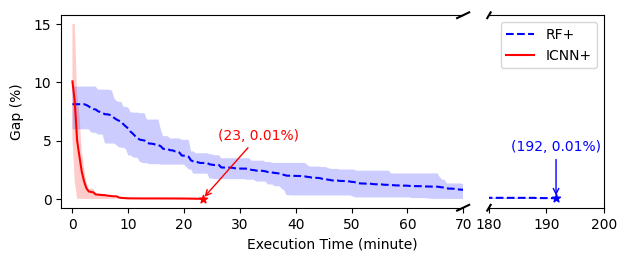

In [15]:
xs = np.linspace(0, 50000, 10000)
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(7, 2.5), gridspec_kw={'width_ratios': [7, 2]})

colors = {"rf": "blue", "nn":"red"}
linestyles = {"rf": "--", "nn":"-"}
for algorithm in ["rf", "nn"]:
    for zone_connectivity in ["True"]:
        yss = list()
        # Load from pkl file
        with open(f"solver_status_{algorithm}.pkl", "rb") as pklfile:
            yss = pickle.load(pklfile)
        
        # # Original code to plot from the result
        # for name in glob.glob(f"results/solver_status/*{algorithm}*{zone_connectivity}*"):
        #     seed = int(name.split('_')[3])
        #     if seed // 10 > 1:
        #         continue
        #     with open(name, "rb") as pklfile:
        #         progress = np.array(pickle.load(pklfile))

        #         if not progress.size:
        #             continue
        #         x = progress[:, 3]
        #         y = (progress[:, 2] - progress[:, 1]) / progress[:, 1] * 100
        #         ys = list()
        #         for i in xs:
        #             arg_i = np.searchsorted(x, i, "left")
        #             if arg_i == 0:
        #                 ys.append(min(15, y[0]))
        #             elif arg_i < y.size:
        #                 ys.append(min(15, (y[arg_i] - y[arg_i - 1]) * (i - x[arg_i - 1]) / (x[arg_i] - x[arg_i - 1]) + y[arg_i - 1]))
        #             else:
        #                 ys.append(y[-1])
                
        #         yss.append(ys)

        ystd = np.array(yss).std(axis=0)
        yq1 = np.quantile(np.array(yss), 0.25, axis=0)
        yq3 = np.quantile(np.array(yss), 0.75, axis=0)
        yss = np.array(yss).mean(axis=0)
        for i in range(yss.size - 1, -1, -1):
            if yss[i] != yss[-1]:
                break
        yss = yss[:i + 2]
        ystd = ystd[:i + 2]
        if algorithm == "rf":
            algorithm_name = "RF"
        else:
            algorithm_name = "ICNN"
        if zone_connectivity == "True":
            algorithm_name += '+'

        ax.plot(xs[:i + 2] * 5 / 60, yss[:i + 2], label=f"{algorithm_name}", color=colors[algorithm], linestyle=linestyles[algorithm])
        ax.fill_between(xs[:i + 2] * 5 / 60, yq1[:i + 2], yq3[:i + 2], alpha=0.2, color=colors[algorithm], edgecolor=None)

        ax2.plot(xs[:i + 2] * 5 / 60, yss[:i + 2], label=f"{algorithm_name}", color=colors[algorithm], linestyle=linestyles[algorithm])
        ax2.fill_between(xs[:i + 2] * 5 / 60, yq1[:i + 2], yq3[:i + 2], alpha=0.2, color=colors[algorithm], edgecolor=None)

        ax.scatter(xs[i + 1] * 5 / 60, yss[i + 1], marker="*", color=colors[algorithm])
        ax2.scatter(xs[i + 1] * 5 / 60, yss[i + 1], marker="*", color=colors[algorithm])
        if algorithm == "rf":
            ax2.annotate(f"({xs[i + 1] * 5 / 60:.0f}, 0.01%)", (xs[i + 1] * 5 / 60, yss[i + 1]), (xs[i + 1] * 5 / 60, yss[i + 1] + 5), arrowprops=dict(arrowstyle="->", edgecolor=colors[algorithm]), ha="center", va="top", color=colors[algorithm])
        else:
            ax.annotate(f"({xs[i + 1] * 5 / 60:.0f}, 0.01%)", (xs[i + 1] * 5 / 60, yss[i + 1]), (xs[i + 1] * 5 / 60 + 10, yss[i + 1] + 6), arrowprops=dict(arrowstyle="->", edgecolor=colors[algorithm]), ha="center", va="top", color=colors[algorithm])

ax.set_xlim([-2, 70])
ax2.set_xlim([180, 200])

ax.spines['right'].set_visible(False)
ax2.set_yticks([])
ax2.spines['left'].set_visible(False)
ax2.tick_params(labelleft=False)  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)  # bottom-right diagonal

plt.subplots_adjust(wspace=0.1)
ax2.legend()

ax3 = fig.add_subplot(111, frameon=False)
ax3.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
ax3.set_ylabel("Gap (%)")
ax3.set_xlabel("Execution Time (minute)")
plt.show()